# Module 1: Can Food Models have Bias? 
### _A rigorous evaluation of the impact of data on model performance_

Model performance can vary significantly with different groups or types of data, especially if a model has high bias. Models have bias in part because training data has bias, and training data has bias because people curate training data. A prerequisite to evaluating model bias is understanding how your model performs on different types of data. To achieve a comprehensive understanding of model performance, you can use established evaluation metrics. In this module, you will learn what those metrics are, how they work, and how to interpret them. 


<img src="model_bias.png" alt="drawing" width="450" height="450"/>

This module will take place over the course of 3 in-class periods and an assignment. The schedule for the module is as follows: 

## Module Schedule

### Day 1: Intro to the Blackbox

#### _Agenda:_

* Discussion: impacts of machine learning (15 min)
* Lecture: The life cycle of an ML model (15 min)
* In-class activity: Playing with input data (40 min)
* Reflection (15 min)
* Brief course overview and assignment intro (10 min)
* Fill out course entrance survey and ask remaining questions (5 min)

#### _Homework:_ 

* Read [this](https://www.datacamp.com/blog/machine-learning-lifecycle-explained) article on the ML model development cycle

### Day 2: Model Evaluation

#### _Agenda:_

* Discussion: Debriefing the homework reading (10 min)
* Lecture: Evaluation Metrics (20 min)
* In-class activity: Interpreting metrics practice (40 min)
* Reflection (5 min)
* Work time: Assignment 1 (25 min)

#### _Homework:_ 

* Finish through section x of assignment 1 (in this notebook!)
* Read [this](https://spotintelligence.com/2023/04/07/data-quality-machine-learning/) article on evaluating data quality

### Day 3: Dataset Evaluation

#### _Agenda:_

* Discussion: How might you use evaluation metrics to assess bias? (15 min)
* Lecture: 
    - Dataset splitting (10 min)
    - In dataset vs. out of dataset evaluation (10 min)
* In class activity: Playing with datasets and dataset splitting (40 min)
* Reflection (5 min)
* Work time: Assignment 1 (20 min)

### _Homework:_ 

* Finish assignment 1

# Assignment 1: 
Welcome to the first Assignment of Machine Learning! In this assignment, you are the head of the R&D department at Pie-thagoras Labs, a new FoodTech start-up that is aimed at helping members of the visually impaired and blind community in different food-related situations. The first product you are making is an image-based dessert classifier that enables users to obtained detailed information about foods in front of them by simply taking a picture (read [this paper](https://www.jsr.org/hs/index.php/path/article/view/2341) if you are interested in diving deeper into image-based food classifiers). As a part of developing this product, three of your employees have trained their own classification models (`model`, `model2`, and `model3`) on different components of the dessert dataset. It is now your responsibility to evaluate each of them. By the end of your analysis, you need to give a thorough assessment of each model, including which (if any) should be integrated into your company's consumer products.

## Section 1: Metrics Overview
Before being able to evaluate your employees' models, you need to implement metrics that help you quantitatively assess the validation results of each model. The metrics you will implement in this assignment are:

* Confusion Matrix 
* Classification Accuracy
* Precision 
* Recall

_Consult [this article](https://arxiv.org/abs/2008.05756) to learn about the metrics and inform your implementation_

### Confusion Matrix

A confusion matrix is ... TODO: finish description. Maybe talk about binary classification because it's not discussed elsewhere. 

First, we need to import the modules we are going to use

In [3]:
# Matplotlib allows us to make plots
import matplotlib
# Matplotlib inline allows us to interact with plots, via zooming, etc.
%matplotlib inline

In [4]:
# OpenCV is used for computer vision tasks
import cv2
# Tensorflow is a machine learning framework
import tensorflow as tf
# Json helps us work with json file formats
import json

2023-12-09 17:38:51.665412: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-09 17:38:52.513910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 17:38:53.358774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Next, we are going to import our data from the json file that has the results of our models predictions

In [5]:
with open("results.json", "r") as file:
    data = json.load(file)
    
class_mappings = data["class_indices"]
predictions = [x[0] for x in data["predictions_and_labels"]]
gt_labels = [x[1] for x in data["predictions_and_labels"]]

In [6]:
## Because we haven't worked with models yet, here is what the predictions and labels look like.
## Each of these numbers maps to a particular dessert class, of which there are 23.
## The class indexing starts at 0.  
print(predictions)
print(gt_labels)

[15, 19, 13, 1, 10, 16, 16, 5, 10, 15, 17, 22, 14, 2, 13, 11, 6, 0, 21, 15, 17, 9, 17, 16, 18, 2, 8, 13, 22, 3, 22, 15, 3, 14, 4, 13, 5, 3, 21, 22, 2, 1, 22, 3, 7, 7, 10, 15, 0, 17, 7, 17, 16, 15, 0, 6, 9, 13, 17, 21, 10, 17, 6, 4, 15, 6, 2, 21, 0, 21, 10, 11, 1, 10, 0, 19, 10, 16, 0, 21, 12, 15, 3, 13, 18, 2, 4, 16, 7, 19, 14, 16, 4, 19, 8, 21, 11, 4, 11, 12, 11, 17, 2, 14, 16, 18, 13, 6, 20, 0, 16, 12, 5, 14, 3, 19, 13, 10, 13, 21, 5, 21, 21, 16, 7, 5, 17, 21, 12, 15, 16, 18, 17, 21, 6, 16, 15, 17, 15, 12, 10, 16, 19, 16, 16, 17, 21, 18, 13, 13, 4, 2, 18, 10, 16, 0, 13, 7, 12, 10, 14, 4, 0, 17, 1, 3, 1, 3, 2, 4, 19, 10, 3, 1, 3, 13, 0, 6, 16, 1, 18, 5, 17, 10, 19, 12, 14, 17, 10, 4, 4, 18, 21, 22, 20, 11, 4, 0, 3, 16, 17, 21, 21, 10, 3, 4, 1, 20, 21, 11, 14, 19, 0, 13, 20, 14, 11, 17, 17, 12, 1, 4, 22, 16, 11, 8, 2, 1, 16, 18, 1, 12, 7, 17, 4, 2, 0, 7, 6, 5, 17, 22, 13, 21, 12, 4, 12, 5, 18, 22, 17, 3, 14, 4, 11, 2, 17, 22, 22, 15, 16, 11, 5, 10, 10, 11, 18, 19, 1, 10, 21, 19, 7, 16,

Next, we are going to implement a multi-class confusion matrix. Again, a confusion matrix helps us calculate various metrics that help us determine how well our model performs with input data from different classes. 



#### Exercise 1

In [ ]:
from collections import defaultdict

def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    # Initialize the confusion matrix with zeros
    # The matrix is a 2D list where rows represent the true classes/labels and columns represent the predicted classes/labels
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Iterate over the pairs of predictions and ground truth labels
    for pred, true in zip(predictions, gt_labels):
        # Increment the appropriate cell in the confusion matrix
        # The cell at [true][pred] should be incremented since 'true' is the true class, and 'pred' is the predicted class
        # TODO: Write code here to update the confusion matrix
        pass

    # Return the populated confusion matrix
    return confusion_matrix

#### Answer

In [9]:
# TODO: Make scaffolding for them without providing entire solution
from collections import defaultdict

def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    # Initialize the confusion matrix with zeros
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Populate the confusion matrix
    for pred, true in zip(predictions, gt_labels):
        confusion_matrix[true][pred] += 1

    return confusion_matrix

Now, let's display our confusion matrix. 

In [10]:
class_indices = data["class_indices"]
num_classes = len(class_indices)

# Calculate the confusion matrix
cm = calculate_confusion_matrix(predictions, gt_labels, num_classes)

# Print the confusion matrix
print("Confusion Matrix:")
for row in cm:
    print(row)

Confusion Matrix:
[13, 4, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 2, 1, 3, 0, 0, 1, 1]
[5, 18, 0, 2, 2, 3, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2]
[1, 0, 26, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0]
[2, 3, 0, 16, 3, 0, 0, 5, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 2, 0]
[0, 0, 2, 0, 22, 0, 1, 3, 1, 0, 0, 2, 0, 2, 0, 0, 4, 2, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 18, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 6, 1, 6, 0]
[0, 2, 0, 3, 4, 1, 9, 7, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 3, 0]
[0, 0, 0, 0, 0, 4, 3, 14, 0, 0, 0, 1, 2, 2, 0, 0, 4, 0, 0, 4, 0, 4, 2]
[0, 1, 2, 0, 3, 0, 0, 9, 10, 1, 1, 1, 0, 0, 0, 4, 6, 0, 0, 0, 0, 2, 0]
[1, 0, 1, 0, 2, 1, 1, 2, 0, 26, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 35, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0]
[2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 28, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 29, 3, 0, 0, 3, 1, 1, 0, 0, 2, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 28, 1, 3, 1, 3, 2, 0

Now that we have our confusion matrix, we can calculate various metrics that are embedded within it. Because this is a multi-class classification, the metrics will be relative to each class. For example, a true positive for the churro class will be a correctly identified churro, and a true negative will be something that's not a churro being identified as not a churro. 

## TP, TN, FP, and FN

<img src="hotdog.png" alt="drawing" width="450" height="450"/>

### True Positive 
The number of true positives for a particular class is the number of correctly identified images of that class. We can calculate this because we know what the labels of the images should be, as they come from our test data. 

In a multi-class confusion matrix, these are the diagonal elements of the matrix. 

### True Negative 
The number of true negatives for a particular class is the number of images that are not from the class and were identified as being not from the class. 

In a multi-class confusion matrix, it is the sum of all of the elements that are not in the class index's row and column. 

### False Positive 
The number of false positives for a particular class is the number of images that are not from the class but were identified as being from the class. For example, a non-churro was labeled as a churro. 

In a multi-class confusion matrix, it is the sum of the values in the column for the class, without the true positive term at the [class_index, class_index] position in the diagonal. 

### False Negative
The number of false negatives for a particular class is the number of images that are from the class that are labeled as being not from the class. For example, a churro picture was misclassified as an apple. 

In a multi-class confusion matrix, it is the sum of the values in the row for that class, excluding the diagonal true positive term. 

Let's implement a function that will calculate these metrics!

#### Exercise 2

In [ ]:
from collections import defaultdict

def calculate_confusion_matrix_details(confusion_matrix):
    # Get the number of classes from the confusion matrix's size
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)

    # Iterate over each class to calculate TP, FP, FN, and TN
    for i in range(num_classes):
        # TODO: Calculate True Positives (TP) for the current class
        # Hint: TP is the count of correct predictions for this class, 
        # which is the diagonal element at confusion_matrix[i][i]

        # TODO: Calculate False Positives (FP) for the current class
        # Hint: FP is the sum of predictions for this class (column i), 
        # minus the TP for this class

        # TODO: Calculate False Negatives (FN) for the current class
        # Hint: FN is the sum of instances where this class was the true class 
        # but predicted as something else (row i), minus the TP for this class

        # TODO: Calculate True Negatives (TN) for the current class
        # Hint: TN is a bit more complex. It's the sum of all values in the matrix 
        # that are not part of row i or column i

        # Store the calculated values in the details dictionary
        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    # Return the dictionary containing detailed metrics for each class
    return details

#### Answer

In [11]:
def calculate_confusion_matrix_details(confusion_matrix):
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)

    for i in range(num_classes):
        TP = confusion_matrix[i][i]
        FP = sum(confusion_matrix[j][i] for j in range(num_classes)) - TP
        FN = sum(confusion_matrix[i][j] for j in range(num_classes)) - TP
        TN = sum(sum(confusion_matrix[j][k] for k in range(num_classes) if k != i) for j in range(num_classes) if j != i)

        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    return details

Now you can display the TP, TN, FP, FN information for each class.

In [12]:
cm_details = calculate_confusion_matrix_details(cm)
for class_index, values in cm_details.items():
    print(f"Class {class_index}: {values}")

Class 0: {'TP': 13, 'FP': 18, 'FN': 27, 'TN': 862}
Class 1: {'TP': 18, 'FP': 15, 'FN': 22, 'TN': 865}
Class 2: {'TP': 26, 'FP': 8, 'FN': 14, 'TN': 872}
Class 3: {'TP': 16, 'FP': 19, 'FN': 24, 'TN': 861}
Class 4: {'TP': 22, 'FP': 29, 'FN': 18, 'TN': 851}
Class 5: {'TP': 18, 'FP': 24, 'FN': 22, 'TN': 856}
Class 6: {'TP': 9, 'FP': 20, 'FN': 31, 'TN': 860}
Class 7: {'TP': 14, 'FP': 37, 'FN': 26, 'TN': 843}
Class 8: {'TP': 10, 'FP': 5, 'FN': 30, 'TN': 875}
Class 9: {'TP': 26, 'FP': 4, 'FN': 14, 'TN': 876}
Class 10: {'TP': 35, 'FP': 23, 'FN': 5, 'TN': 857}
Class 11: {'TP': 28, 'FP': 13, 'FN': 12, 'TN': 867}
Class 12: {'TP': 29, 'FP': 19, 'FN': 11, 'TN': 861}
Class 13: {'TP': 28, 'FP': 18, 'FN': 12, 'TN': 862}
Class 14: {'TP': 15, 'FP': 12, 'FN': 25, 'TN': 868}
Class 15: {'TP': 26, 'FP': 19, 'FN': 14, 'TN': 861}
Class 16: {'TP': 27, 'FP': 42, 'FN': 13, 'TN': 838}
Class 17: {'TP': 36, 'FP': 16, 'FN': 4, 'TN': 864}
Class 18: {'TP': 19, 'FP': 21, 'FN': 21, 'TN': 859}
Class 19: {'TP': 11, 'FP': 1

### Classification Accuracy
First, read [this article](https://www.sharpsightlabs.com/blog/classification-accuracy-explained/) about classification accuracy for a brief intro. 

In other words, "classification accuracy is the ratio of the number of correct predictions to the total number of input samples" (Yalug, et al.) ([Source](https://www.sciencedirect.com/science/article/abs/pii/B9780128228289000058))

#### Exercise 3

In [ ]:
def calculate_accuracy(confusion_matrix):
    # TODO: Calculate the sum of True Positives
    # Hint: True Positives for a class are located at the diagonal elements of the confusion matrix,
    # so you need to sum up the diagonal elements of the matrix.
    correct_predictions = ...

    # TODO: Calculate the total number of predictions
    # Hint: The total number of predictions is the sum of all elements in the confusion matrix.
    total_predictions = ...

    # TODO: Calculate accuracy
    # Hint: Accuracy is the ratio of correct_predictions to total_predictions.
    # Make sure to check if total_predictions is not zero to avoid division by zero.
    accuracy = ...

    # Return the calculated accuracy
    return accuracy


#### Answer

In [16]:
def calculate_accuracy(confusion_matrix):
    # Calculate the sum of True Positives
    correct_predictions = sum(confusion_matrix[i][i] for i in range(len(confusion_matrix)))

    # Calculate the total number of predictions
    total_predictions = sum(sum(row) for row in confusion_matrix)

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

Now we can display our accuracy!

In [14]:
# Example usage
accuracy = calculate_accuracy(cm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5271739130434783


### Precision

Explanation

#### Exercise 4

In [ ]:
def calculate_precision(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    precision_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Positives (FP) for the current class from the details
        TP = ...
        FP = ...
        
        # TODO: Calculate precision for each class
        # Hint: Precision is the ratio of TP to the sum of TP and FP.
        # Make sure to check if the sum of TP and FP is not zero to avoid division by zero.
        precision = ...

        # Store the precision score for the class
        precision_scores[class_index] = precision

    # Return the dictionary containing precision scores for each class
    return precision_scores

#### Answer

In [17]:
from collections import defaultdict

def calculate_precision(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    precision_scores = defaultdict(float)

    for class_index, metrics in details.items():
        TP = metrics['TP']
        FP = metrics['FP']
        
        # Calculate precision for each class
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precision_scores[class_index] = precision

    return precision_scores


Now we can display our precision for each class!

In [18]:
# Example usage
precision_scores = calculate_precision(cm)
for class_index, precision in precision_scores.items():
    print(f"Precision for class {class_index}: {precision}")

Precision for class 0: 0.41935483870967744
Precision for class 1: 0.5454545454545454
Precision for class 2: 0.7647058823529411
Precision for class 3: 0.45714285714285713
Precision for class 4: 0.43137254901960786
Precision for class 5: 0.42857142857142855
Precision for class 6: 0.3103448275862069
Precision for class 7: 0.27450980392156865
Precision for class 8: 0.6666666666666666
Precision for class 9: 0.8666666666666667
Precision for class 10: 0.603448275862069
Precision for class 11: 0.6829268292682927
Precision for class 12: 0.6041666666666666
Precision for class 13: 0.6086956521739131
Precision for class 14: 0.5555555555555556
Precision for class 15: 0.5777777777777777
Precision for class 16: 0.391304347826087
Precision for class 17: 0.6923076923076923
Precision for class 18: 0.475
Precision for class 19: 0.3793103448275862
Precision for class 20: 0.625
Precision for class 21: 0.3333333333333333
Precision for class 22: 0.7222222222222222


### Recall

Explanation

#### Exercise 6

In [ ]:
from collections import defaultdict

def calculate_recall(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    recall_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Negatives (FN) for the current class from the details
        TP = ...
        FN = ...
        
        # TODO: Calculate recall for each class
        # Hint: Recall is the ratio of TP to the sum of TP and FN.
        # Make sure to check if the sum of TP and FN is not zero to avoid division by zero.
        recall = ...

        # Store the recall score for the class
        recall_scores[class_index] = recall

    # Return the dictionary containing recall scores for each class
    return recall_scores


#### Answer

In [21]:
from collections import defaultdict

def calculate_recall(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    recall_scores = defaultdict(float)

    for class_index, metrics in details.items():
        TP = metrics['TP']
        FN = metrics['FN']
        
        # Calculate recall for each class
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        recall_scores[class_index] = recall

    return recall_scores

Now we can display our recall for each class!

In [22]:
# Example usage
recall_scores = calculate_recall(cm)
for class_index, recall in recall_scores.items():
    print(f"Recall for class {class_index}: {recall}")

Recall for class 0: 0.325
Recall for class 1: 0.45
Recall for class 2: 0.65
Recall for class 3: 0.4
Recall for class 4: 0.55
Recall for class 5: 0.45
Recall for class 6: 0.225
Recall for class 7: 0.35
Recall for class 8: 0.25
Recall for class 9: 0.65
Recall for class 10: 0.875
Recall for class 11: 0.7
Recall for class 12: 0.725
Recall for class 13: 0.7
Recall for class 14: 0.375
Recall for class 15: 0.65
Recall for class 16: 0.675
Recall for class 17: 0.9
Recall for class 18: 0.475
Recall for class 19: 0.275
Recall for class 20: 0.375
Recall for class 21: 0.45
Recall for class 22: 0.65


## Section 2: Model Analysis
Now that you have helper functions to assist you with your model analysis, it is now time for you to draft a comprehensive report highlighting the strengths and weaknesses of each model, along with your opinion on if any model is production quality.

### Model Information
Each of the three models are structured as Residual Neural Networks (it's okay if this term doesn't make sense! This will be covered later in the course, but if you're interested, take a look at [this reading](https://www.geeksforgeeks.org/residual-networks-resnet-deep-learning/) for more information) that were trained on roughly 6300 images. However, each employee had access to varying amounts of data when training their models, which may impact their relative performances.

### Model Testing
Along with each model, we have included results from one iteration of testing of each model. For testing, we ran each model with a set of 2300 images (100 images for each of the 23 dessert classifications that the models were trained on), yielding predictions for each inputted image. The results of these experiments can be found in `data/test_data/modelX_results.json`, which include the ground truth labels, predicted labels, and the dessert item associated with each label. If you believe that this level of testing is not sufficient, you are welcome to conduct your own validation steps. Some possible extensions include (but are not limited to):
- Modifying the current testing datasets and validation pipeline (The testing data can be found in `data/test_data/test_images.npy` and the pipeline for passing in these images can be found in `test_models.py`)
- Finding external datasets to use for assessment (Helper functions for pre-processing and passing external images to the models can be found in `test_models.py`)

### Write-Up Requirements
Now, you are ready to begin your analysis of each model. In your write-up, be sure to include each of the following:
- Utilize the functions you created in Section 2 to explore different estimates of accuracy for each models (include analysis on how the metrics are relevant in the context of this problem)
- One extension (or modification) to the given validation pipeline (If you're looking for your own dataset, `www.kaggle.com` or `https://towardsdatascience.com/top-sources-for-machine-learning-datasets-bb6d0dc3378b` outline great starting points - also feel free to take pictures in the dining hall)
- For each model you believe is fit for production, include an assessment of any outstanding risks associated with the model(s) and potential methods for mitigating those risks.
- For each model you believe is not fit for production, propose improvements that the respective employees could take to improve their model
- For every model, highlight the process and quantitative analysis that led to your assessment.

Be sure to attach any code/resources you used to create your write-up.

In [29]:
# These are the three models submitted to you by your employees
model1 =  tf.keras.models.load_model("model1_weights.keras")
model2 =  tf.keras.models.load_model("model2_weights.keras")
model3 =  tf.keras.models.load_model("model3_weights.keras")

OSError: No file or directory found at model1_weights.keras

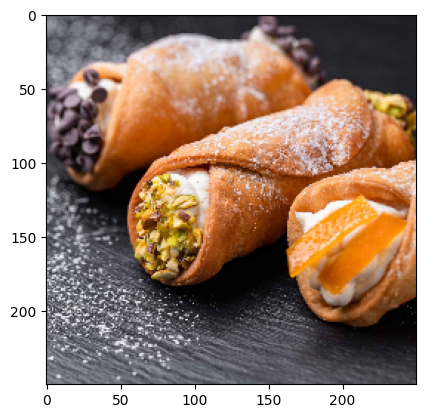

In [ ]:
img = cv2.imread("cannoli-recipe-snippet.jpg")
img = cv2.cvtColor(cv2.resize(img, [250, 250]), cv2.COLOR_BGR2RGB)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()
